# 0. Introduction
1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling


# 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns',100)

# 2. Loading Data

In [2]:
train = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')

# 3. Data at first sight

대회 데이터 설명

* 유사한 그룹에 속하는 feature는 feature 이름 (예. ind, reg, car, calc)에 태그가 지정
* 이러한 지정이 없는 feature는 연속형 또는 서수형
* -1의 값은 해당 feature이 누락되었음을 나타냄
* target 열은 해당 보험 가입자에 대한 청구가 제기되었는지 여부를 나타냄

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


다음을 확인할 수 있음

* 이진 변수
* 범주 값이 정수인 범주형 변수
* 정수 또는 실수형 값을 가진 다른 변수들
* 결측값을 나타내는 -1 변수
* target변수와 id 변수

In [5]:
train.shape

(595212, 59)

59개의 변수와 595,212개의 행이 존재함.

중복된 행이 있는지 확인.

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

중복된 행이 존재하지 않음.

In [7]:
test.shape

(892816, 58)

테스트 세트에 하나의 변수가 누락되었지만, 이것은 target 변수임.

나중에 14개 범주형 변수에 대한 더미 변수를 만들 수 있음.
bin변수는 이미 이진 변수이므로 더미화할 필요가 없음.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

# 4. Metadata

데이터 관리를 용이하게 하기 위해 변수에 대한 메타 정보를 데이터프레임에 저장함.

이는 분석, 시각화, 모델링 등을 위해 특정 변수를 선택할 때 유용함.


* role : input, ID, target
* level : nominal, interval, ordinal, binary
* keep : True or False
* dtype : int, float, str

범주형 데이터 - 명목형(Nominal), 순서형(Ordinal)

숫자형 데이터 - 이산형(Discrete), 연속형(Continuous)

In [9]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [10]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'

    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False

    # Defining the data type
    dtype = train[f].dtype

    # Creating a Dict that contains all the metadata for the variable
    f_dict ={
        'varname':f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data,columns=['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

In [11]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


drop되지 않은 모든 nominal 변수를 추출하는 예제

In [12]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [13]:
train.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0


In [14]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# 5. Descriptive statistics

## 5-1. Interval variables(구간 자료)

In [15]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


reg_variables(회귀변수)
* ps_reg_03에만 결측값이 있음
* 변수마다 범위(최소에서 최대)가 다름. 스케일링을 적용할 수 있지만 사용하려는 classifier에 따라 다름

car_variables
* ps_car_12 및 ps_car_15에 결측값이 존재함.
* 범위가 다르기 때문에 스케일링 적용할 수 있음.

calc_variables(계산변수)
* 결측값 없음.
* 최대값이 0.9이므로 일종의 비율인 것 같음.
* 세가지 calc변수 모두 유사한 분포를 가지고 있음.
* 전반적으로 구간 변수의 범위가 다소 작다는 것을 알 수 있음. 데이터를 익명화하기 위해 이미 어떤 변환(예:로그)가 적용되고 있을 수 있음

## 5-2. Ordinal variables(순서 자료)

In [16]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- ps_car_11에서 결측값을 보임.
- 범위가 다른 것들에 대해 스케일링을 적용할 수 있음.

## 5-3. Binary variables

In [17]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


target변수 대부분이 0의 값을 가지고 있음.

# 6. Handling imbalanced classes

target = 1인 레코드의 비율은 target=0보다 훨씬 적음.

이는 정확도가 높지만 실제로 부가가치가 있는 모델로 이어질 수 있음.

이문제를 해결하기 위한 두가지 전략은 다음과 같음

- target=1로 레코드 오버샘플링하기
- target=0인 언더샘플링 레코드

언더샘플링
- 데이터의 클래스 불균형 문제를 해결하기 위한 기법 중 하나
- 데이터셋에서 다수 클래스의 샘플 수를 줄여 소수 클래스와의 비율을 맞추는 방법

In [18]:
desired_apriori = 0.10

# Get the indices per target value

idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

print('nb_0 :',nb_0)
print('nb_1 :',nb_1)

# Calculate the undersampling rate and resulting number of records with target = 0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
# 분자 : 다수 클래스(0)의 목표 비율
# 분모 : 소수 클래스(1)의 목표 비율
undersampled_nb_0 = int(undersampling_rate*nb_0) # 언더 샘플링 이후 남길 target=0 샘플의 수

print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target = 0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

nb_0 : 573518
nb_1 : 21694
Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


# 7. Data Qiality Checks

## 7-1. Checking missing values
Missings are represented as -1

In [19]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f]==-1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]

        print('Variable {} has {} records ({:.2%}) with missing values'.
             format(f, missings, missings_perc))


print('In total, there are {} variables with missing values'.
     format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


* ps_car_03_cat와 ps_car_05_cat은 결측값이 있는 레코드의 비율이 높음. 이는 제거하도록 함.
* 결측값이 있는 다른 범주형 변수의 경우 결측값을 그대로 둘 수 있음.
* ps_reg_03(연속)은 모든 레코드의 18%에서 결측값을 가짐. 평균으로 대체함
* ps_car_11(순서)에는 값이 누락된 레코드가 5개만 존재함. mode로 대체함. - 최빈값
* ps_car_12(연속)는 결측값이 있는 레코드가 하나 뿐임. 평균으로 대체함.
* ps_car_14(연속)는 모든 레코드의7%에서 결측값을 가짐. 평균으로 대체함.

In [20]:
# Dropping the variables with too many missing values
vars_to_drop =['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop,inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False # Updating the meta

In [21]:
# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1,strategy='mean')
mode_imp = SimpleImputer(missing_values=-1,strategy='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

## 7-2. Checking the cardinality of the categorical variables

카디널리티는 변수에서 서로 다른 값의 수를 의미함.

나중에 범주형 변수에서 더미 변수를 만들 예정이므로 서로 다른 값을 가진 변수가 많은지 확인해야함.

이러한 변수는 더미변수가 많기 때문에 다르게 처리해야함.

In [22]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f,dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- ps_car_11_cat은 많은 고유값을 가지고 있음.

In [23]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

def add_noise(series, noise_level): # 주어진 시리즈에 노이즈 추가
                                    # 노이즈 추가함으로써 모델의 과적합 방지
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, # 훈련 데이터의 범주형 변수
                  tst_series=None, # 테스트 데이터의 범주형 변수
                  target=None, 
                  min_samples_leaf=1, # 최소 샘플 수. 이 값보다 적은 샘플을 가진 카테고리는 평균을 계산하지 않음.
                  smoothing=1, # 타겟 평균을 보정할 때 사용할 값. 높을수록 카테고리 평균을 타겟 평균에 더 가깝게 만듬
                  noise_level=0): # 타겟 인코딩에 추가할 노이즈의 크기기

    # 훈련용 데이터와 테스트 데이터에 대해 타켓 인코딩 수행
    # 각 범주형 변수에 대해 타겟변수의 평균을 계산하고 새로운 특성 생성.
    # smoothing과 min_sample_leaf 값을 조정하여 계산된 평균 보정
    # 훈련 데이터와 테스트 데이터에서 계산된 타겟 인코딩 값에 노이즈 추가하여 반환
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 

    # trn_series와 target의 길이가 같고, trn_series와 tst_series가 같은 이름을 가질 것이라는 조건 검증
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    # trn_series의 각 고유 값에 대해 target의 평균과 개수를 계산.
    # 카테고리별 타겟 변수의 평균과 샘플 개수를 확인할 수 있음.
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    # 카테고리의 샘플 수가 적을수록 타겟 평균을 전체 평균에 더 가깝게 만들어 과적합을 방지하도록 함
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    # 카테고리별 평균을 prior와 averages["mean"]을 통해 계산 함.
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    # 훈련 데이터에 대해 averages를 병합하여 타겟 평균 계산
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [24]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)


In [25]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,0,6,1,1,2,1,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.093298
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,0,14,1,1,2,1,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.119670
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,0,3,1,1,2,1,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.096419
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,0,1,1,1,0,1,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.087082
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,0,0,0,1,0,1,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.107288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,1487473,1,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,11,0,0,5,1,1,2,1,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0,0.120516
216936,1487566,1,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,0.898861,11,0,0,15,1,1,2,1,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0,0.114187
216937,1487716,1,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,11,1,0,7,1,1,1,1,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0,0.119799
216938,1487748,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.1,0.577170,7,1,0,11,1,0,2,1,2,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4,0,0,1,0,1,0,0.119635


# 8. Exploratory Data Visualization

## 8-1. Categorical variables

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'],
      dtype='object', name='varname')
   ps_ind_02_cat    target
0             -1  0.388350
4              4  0.112349
2              2  0.104102
3              3  0.101746
1              1  0.098190


<Figure size 640x480 with 0 Axes>

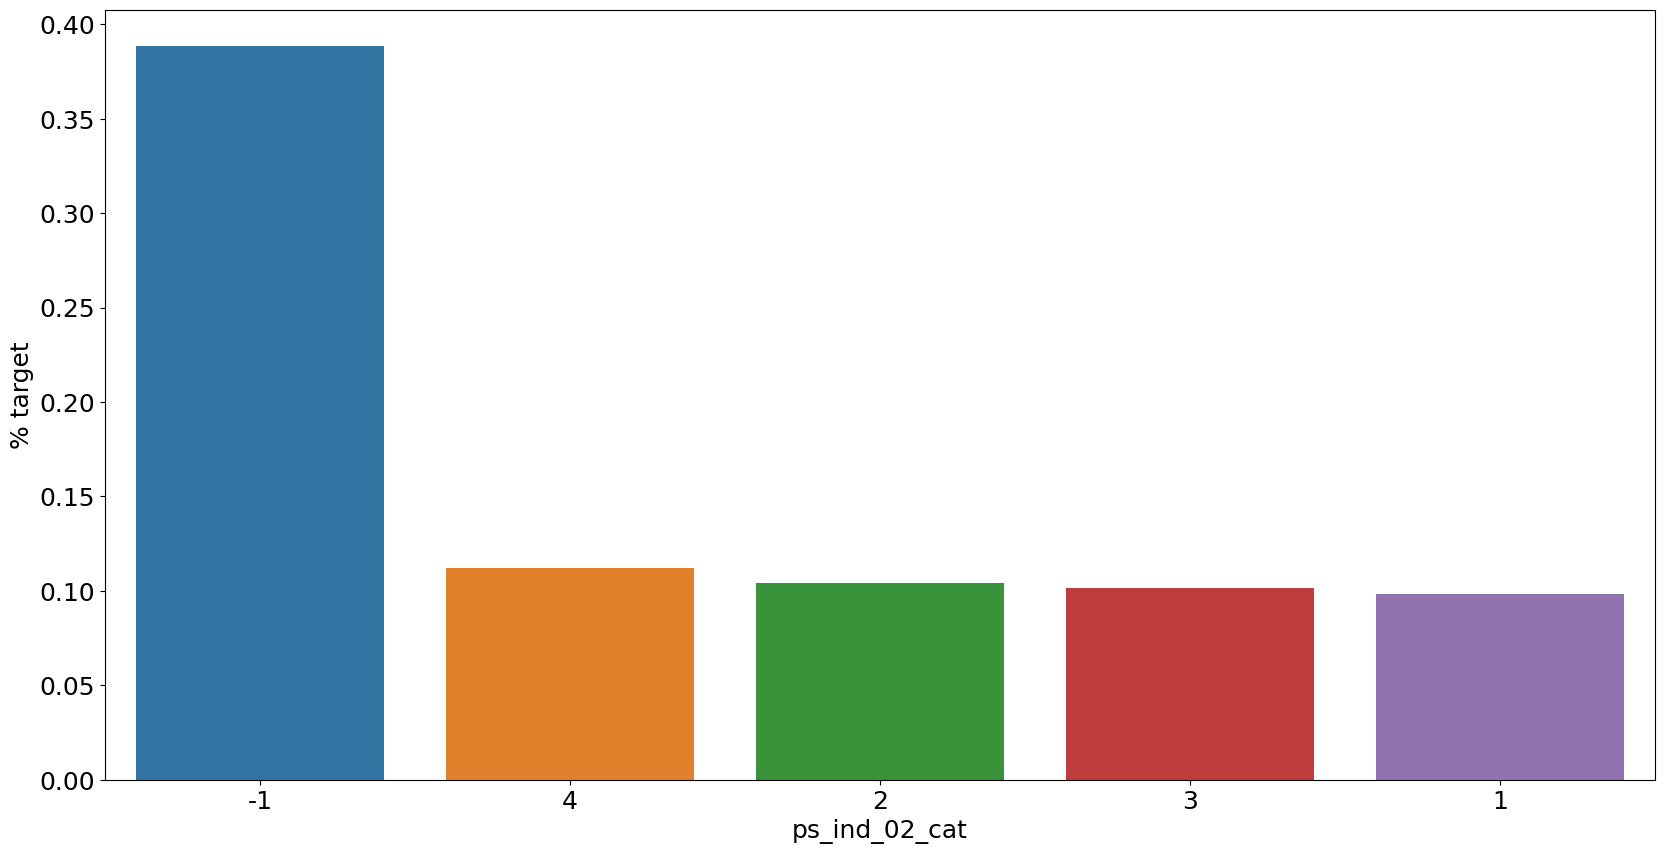

   ps_ind_04_cat    target
0             -1  0.647059
2              1  0.105431
1              0  0.095856


<Figure size 640x480 with 0 Axes>

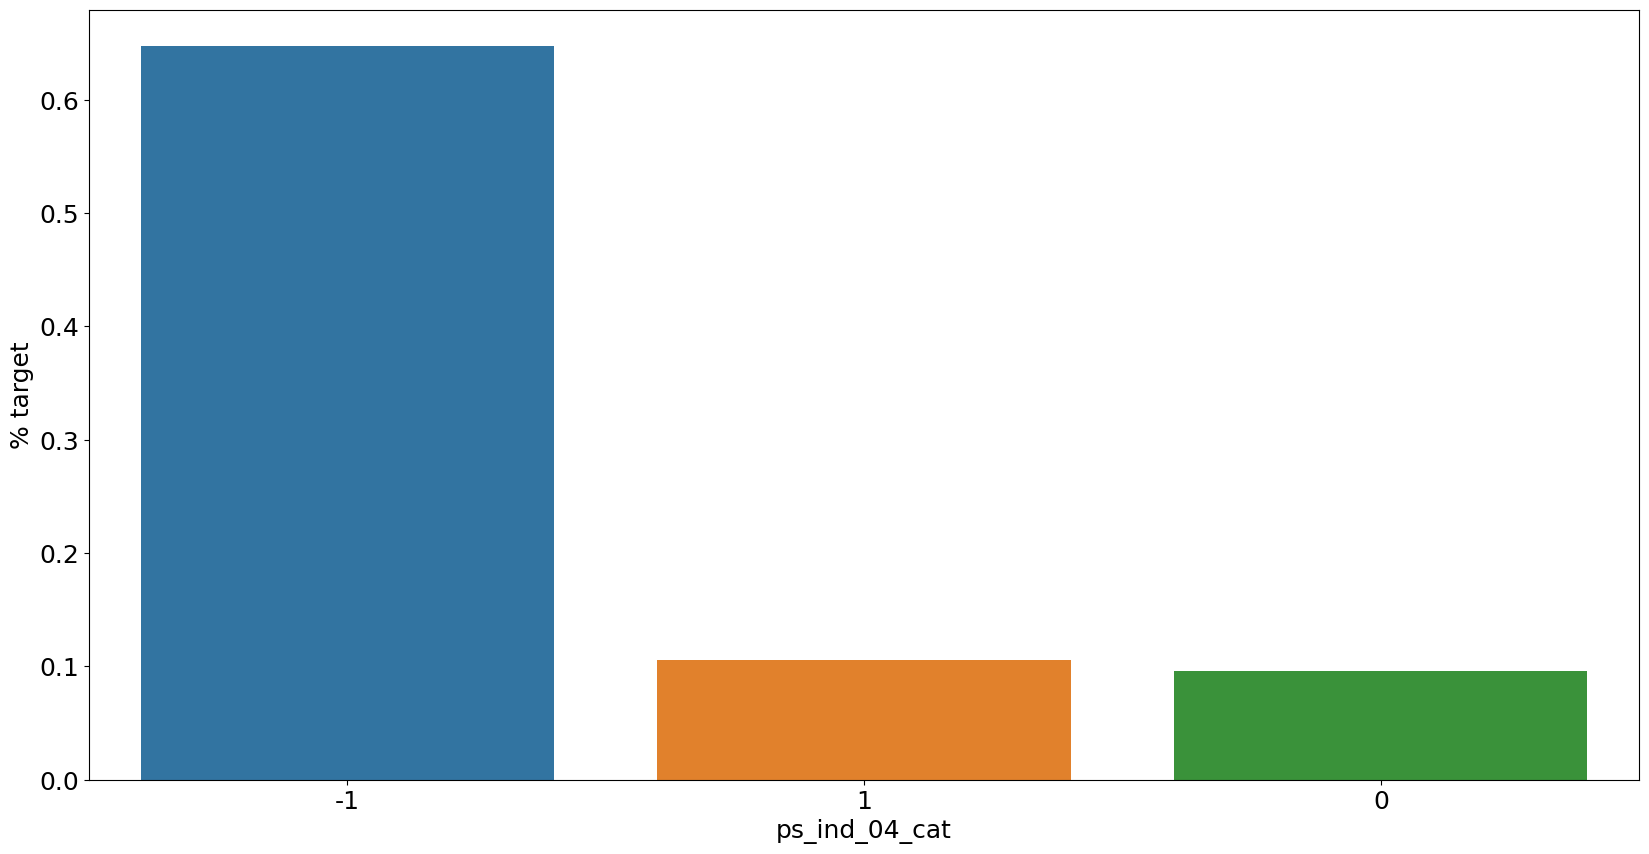

   ps_ind_05_cat    target
0             -1  0.214539
3              2  0.199495
7              6  0.156298
5              4  0.140752
6              5  0.134907
2              1  0.129896
4              3  0.116066
1              0  0.093245


<Figure size 640x480 with 0 Axes>

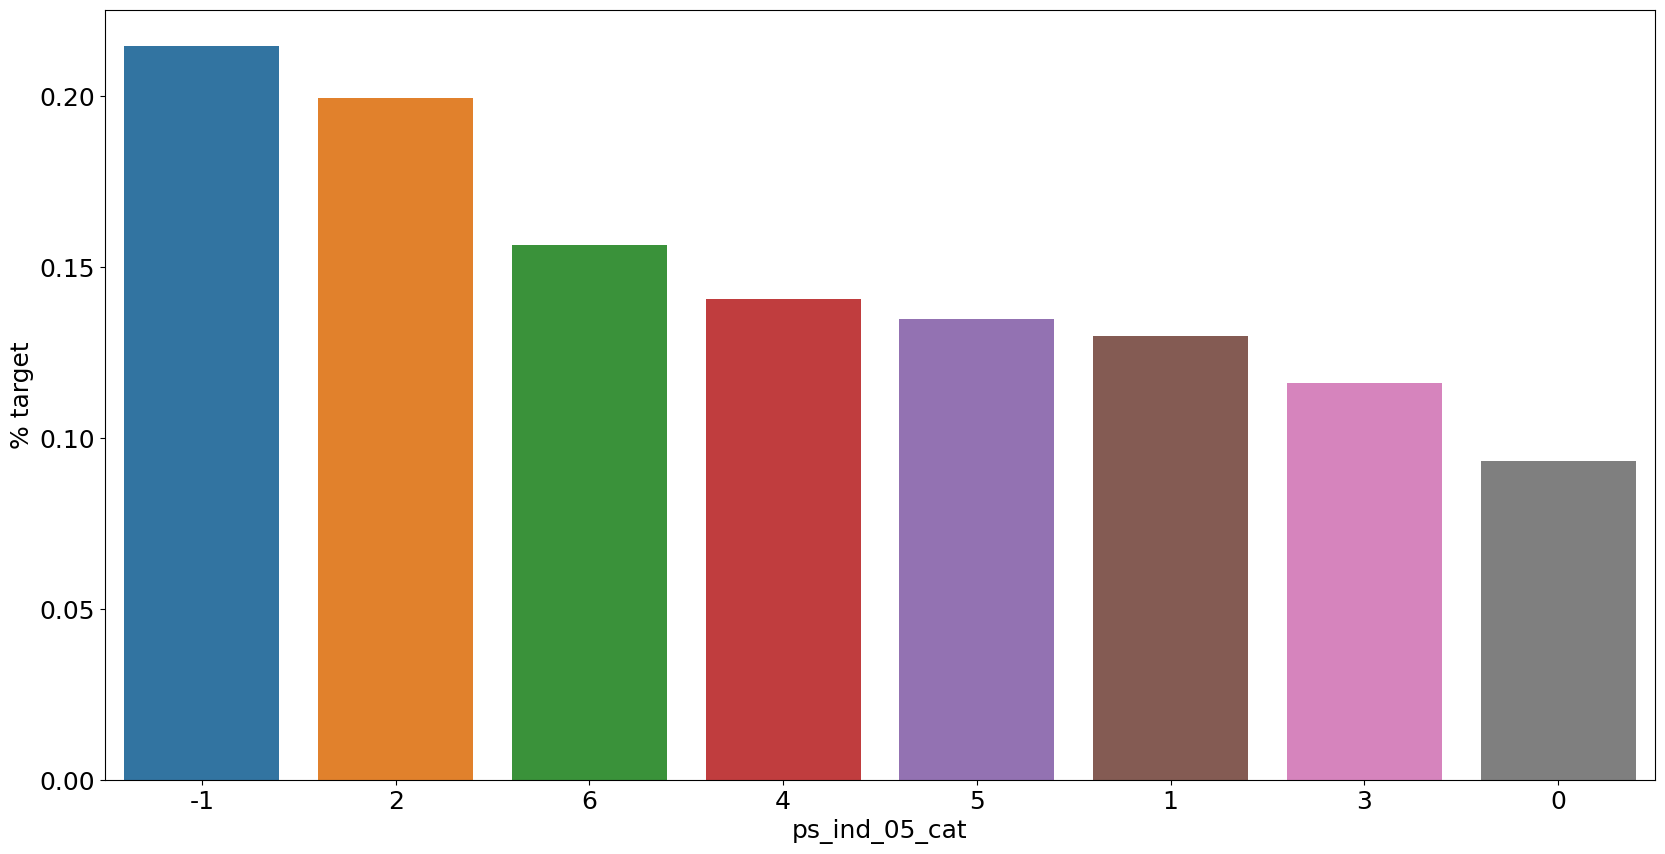

    ps_car_01_cat    target
0              -1  0.548387
10              9  0.143879
2               1  0.133056
1               0  0.117781
9               8  0.117552
3               2  0.114144
12             11  0.112632
5               4  0.107016
6               5  0.106827
4               3  0.105396
11             10  0.101119
7               6  0.083513
8               7  0.080156


<Figure size 640x480 with 0 Axes>

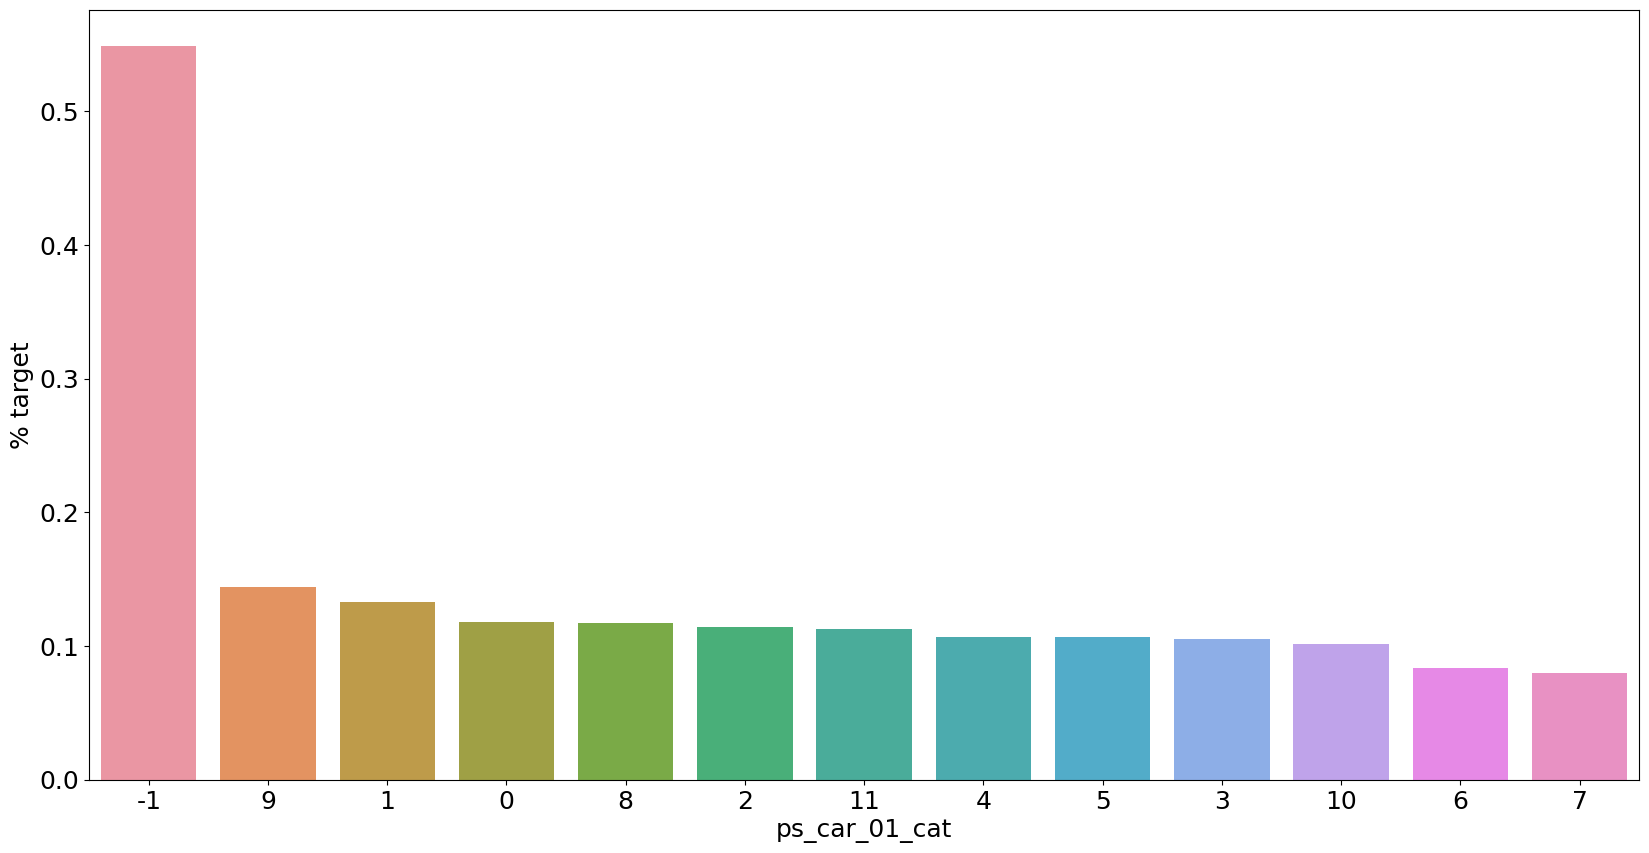

   ps_car_02_cat    target
1              0  0.131868
2              1  0.093233
0             -1  0.000000


<Figure size 640x480 with 0 Axes>

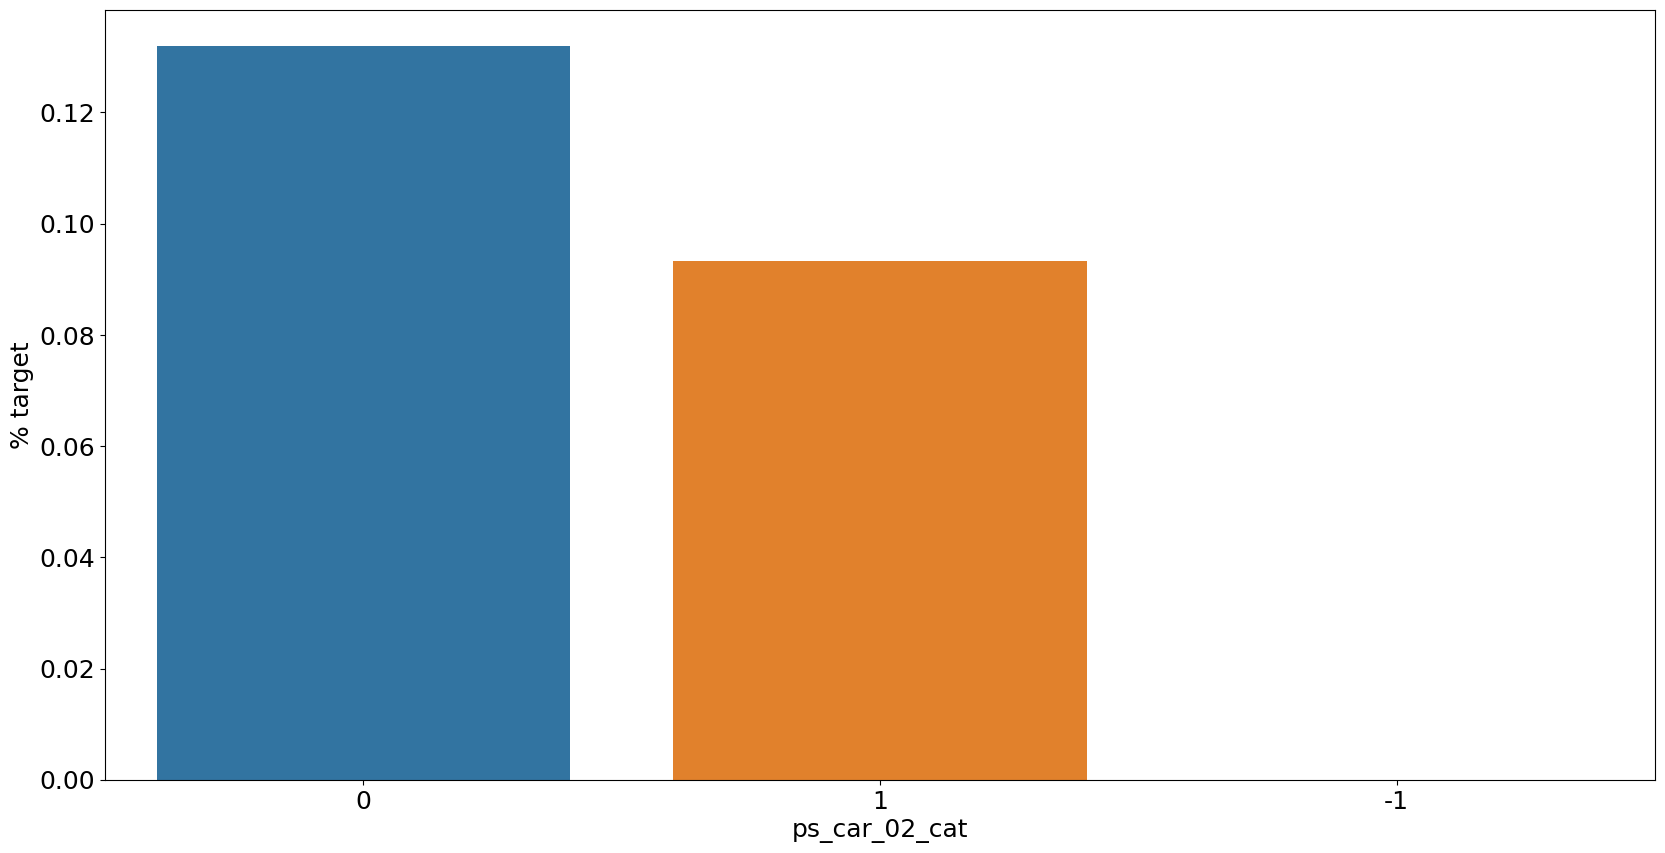

   ps_car_04_cat    target
7              7  0.240741
5              5  0.185714
9              9  0.162797
6              6  0.143526
3              3  0.139831
8              8  0.135139
1              1  0.129726
2              2  0.127326
0              0  0.092311
4              4  0.067568


<Figure size 640x480 with 0 Axes>

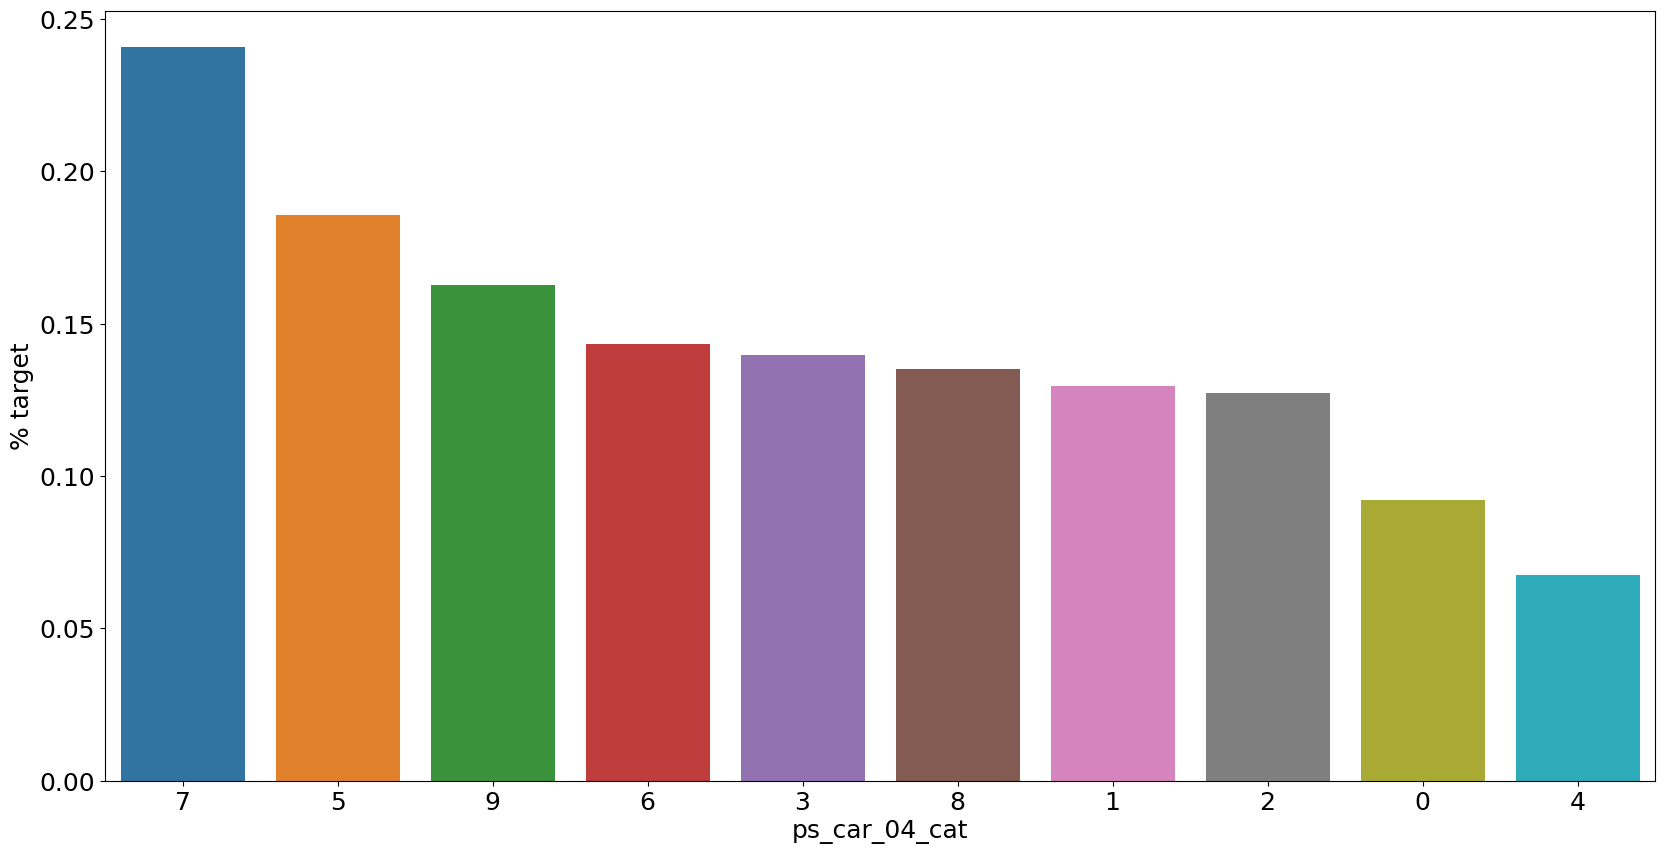

    ps_car_06_cat    target
5               5  0.181818
8               8  0.181481
2               2  0.173203
17             17  0.167732
13             13  0.151296
9               9  0.145408
15             15  0.136085
12             12  0.133487
10             10  0.119023
16             16  0.118083
7               7  0.105060
3               3  0.103761
6               6  0.100104
14             14  0.094358
1               1  0.094294
4               4  0.093589
0               0  0.092116
11             11  0.088045


<Figure size 640x480 with 0 Axes>

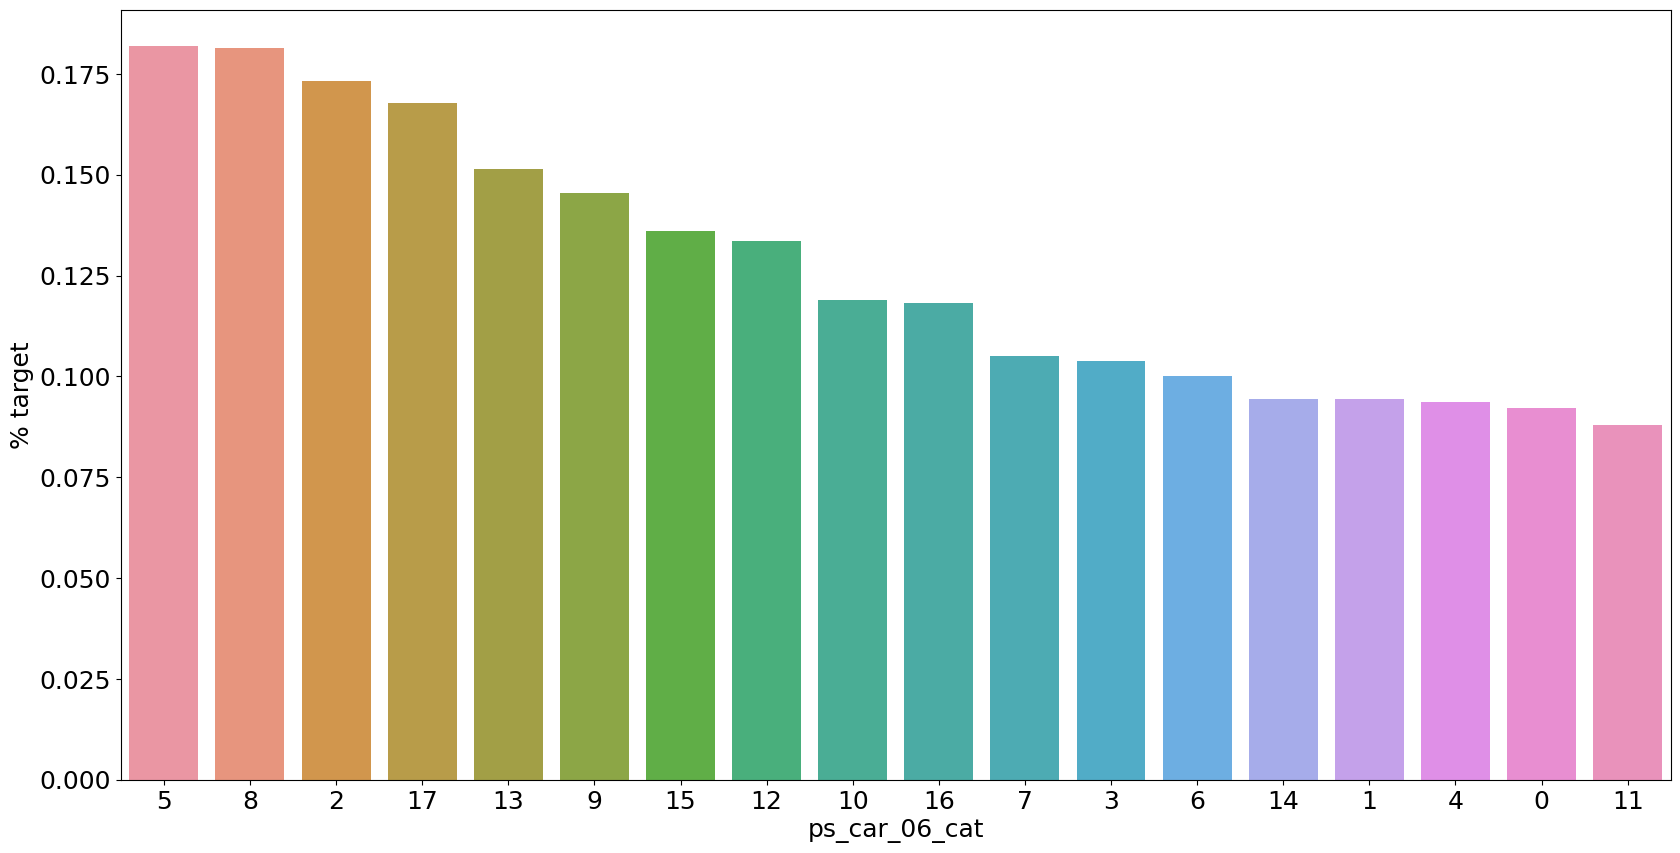

   ps_car_07_cat    target
0             -1  0.202663
1              0  0.136932
2              1  0.095639


<Figure size 640x480 with 0 Axes>

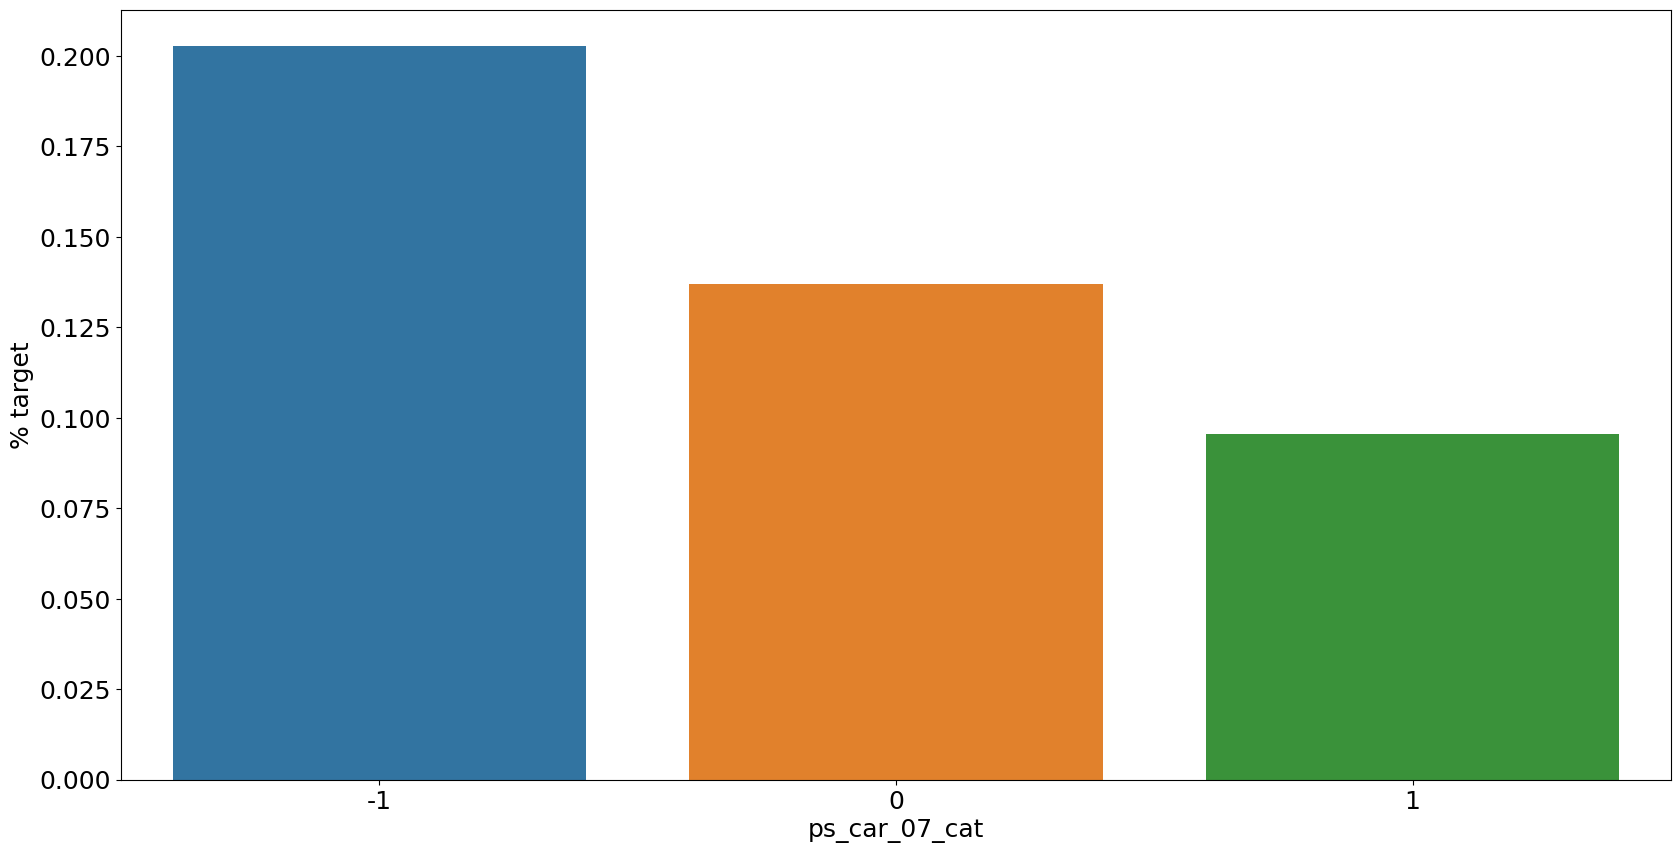

   ps_car_08_cat    target
0              0  0.121579
1              1  0.095572


<Figure size 640x480 with 0 Axes>

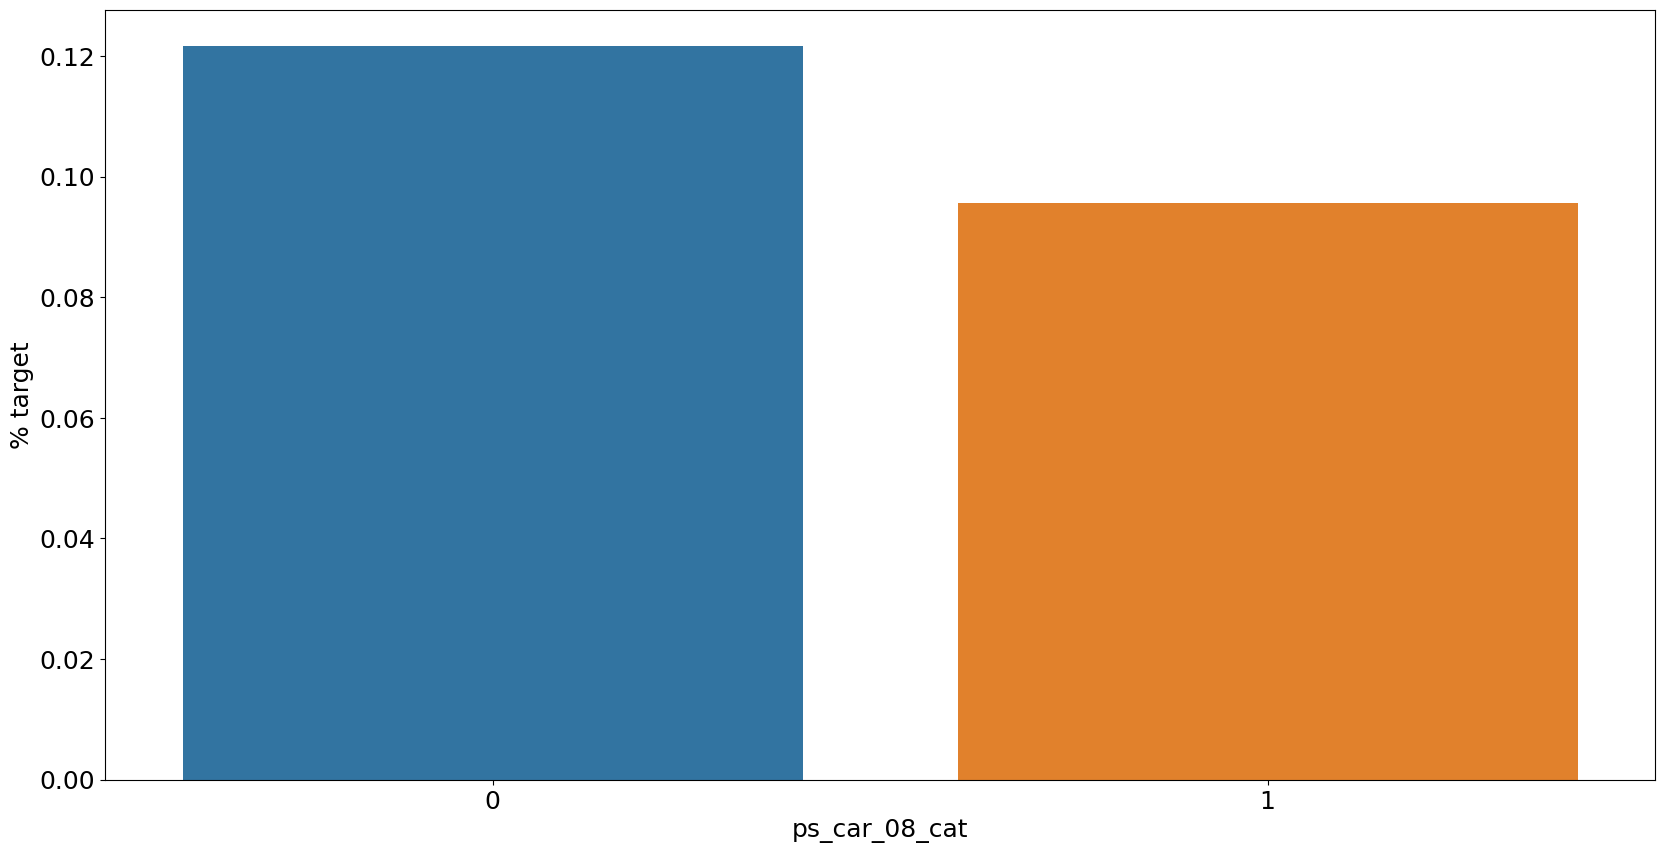

   ps_car_09_cat    target
0             -1  0.226087
2              1  0.149783
5              4  0.135338
3              2  0.099636
4              3  0.096570
1              0  0.092161


<Figure size 640x480 with 0 Axes>

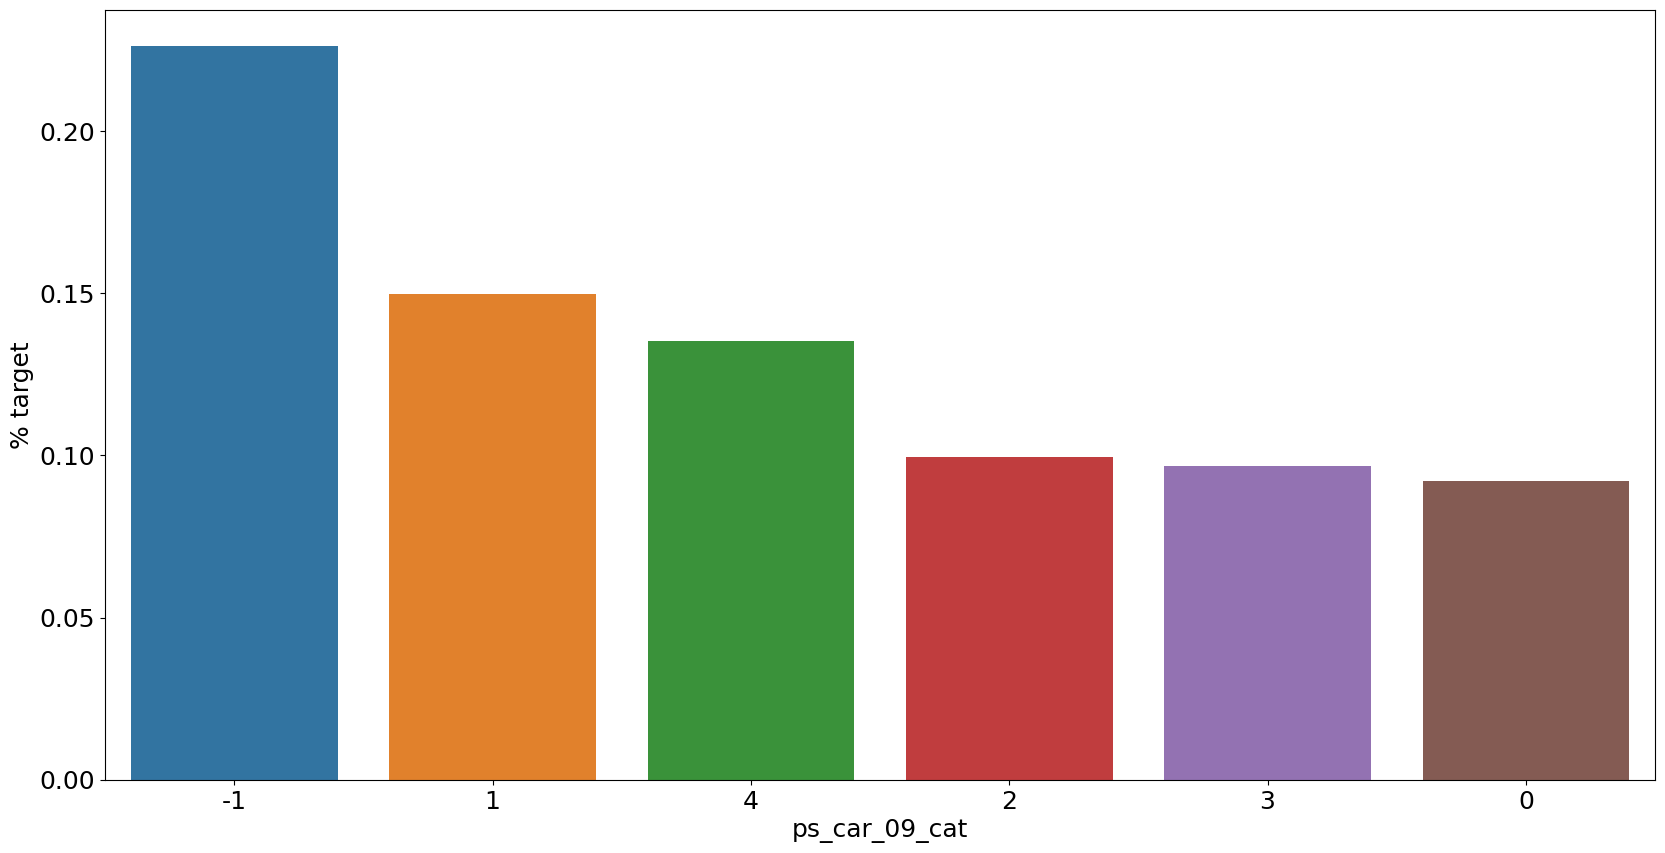

   ps_car_10_cat    target
1              1  0.100029
2              2  0.100000
0              0  0.096420


<Figure size 640x480 with 0 Axes>

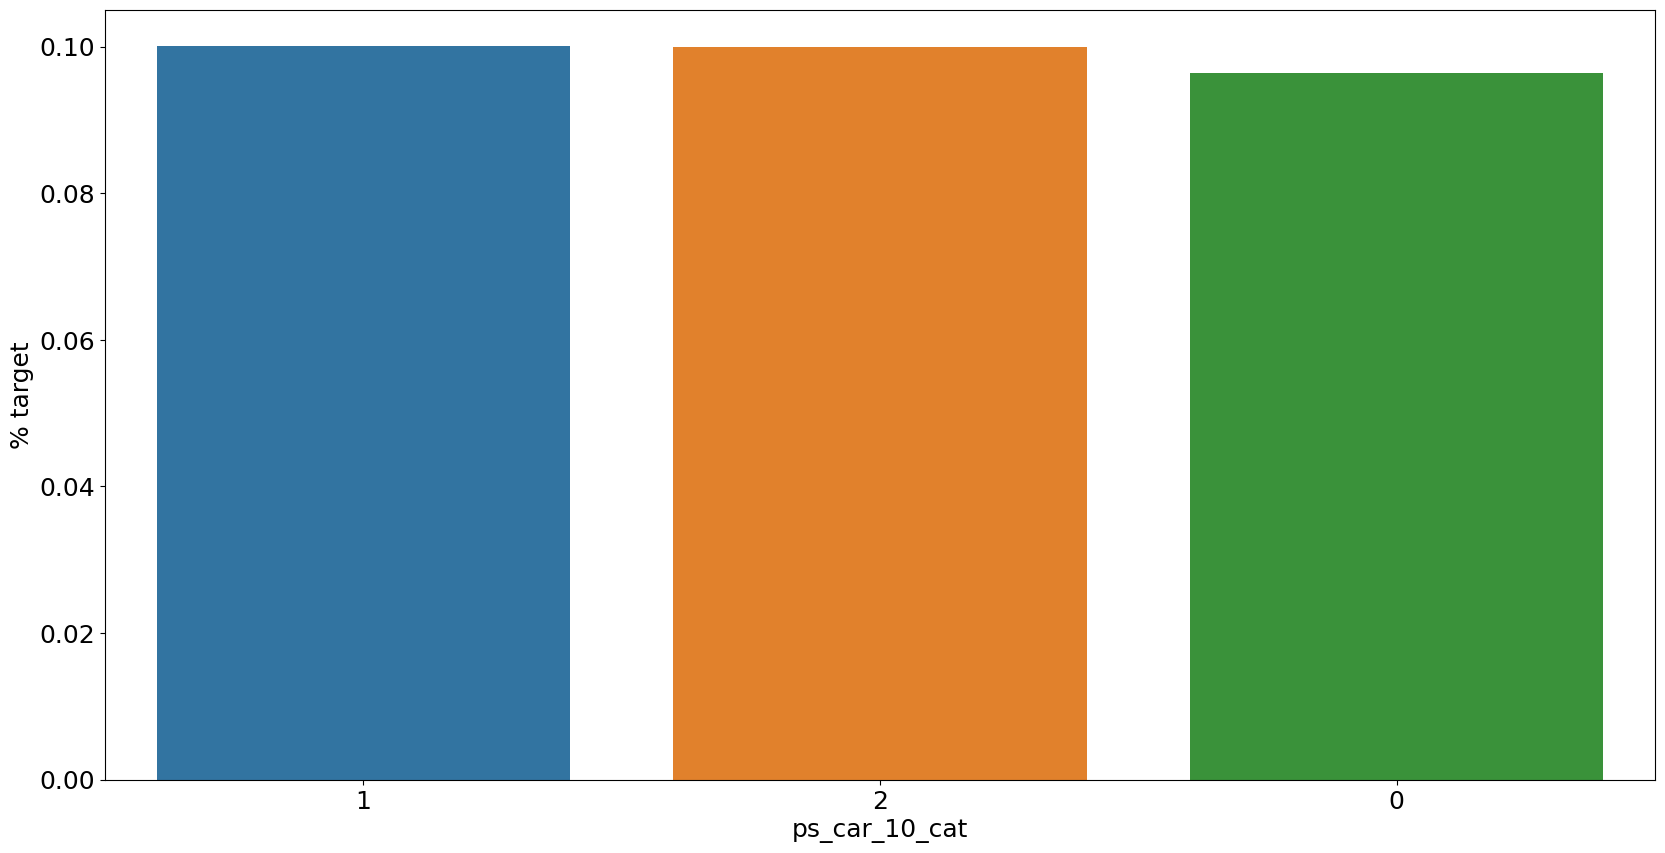

In [26]:
v = meta[(meta.level=='nominal')&(meta.keep)].index
print(v)
for f in v:
    plt.figure()
    fig,ax = plt.subplots(figsize=(20,10))
    # Calcuate the percentage of target = 1 per category value
    cat_perc = train[[f,'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target',ascending=False, inplace=True)
    print(cat_perc)

    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f,fontsize=18)
    plt.tick_params(axis='both',which='major',labelsize=18)
    plt.show()
    plt.close()

결측값이 있는 변수에서 볼 수 있듯

결측값을 예를들어 mode로 대체하는 대신 별도의 카테고리 값으로 유지하는 것이 좋음.

결측값이 있는 고객은 보험 청구를 요청할 확률이 더 높은것으로 보임.(어떤 경우에는 낮긴함...)

## 8-2. Interval variables

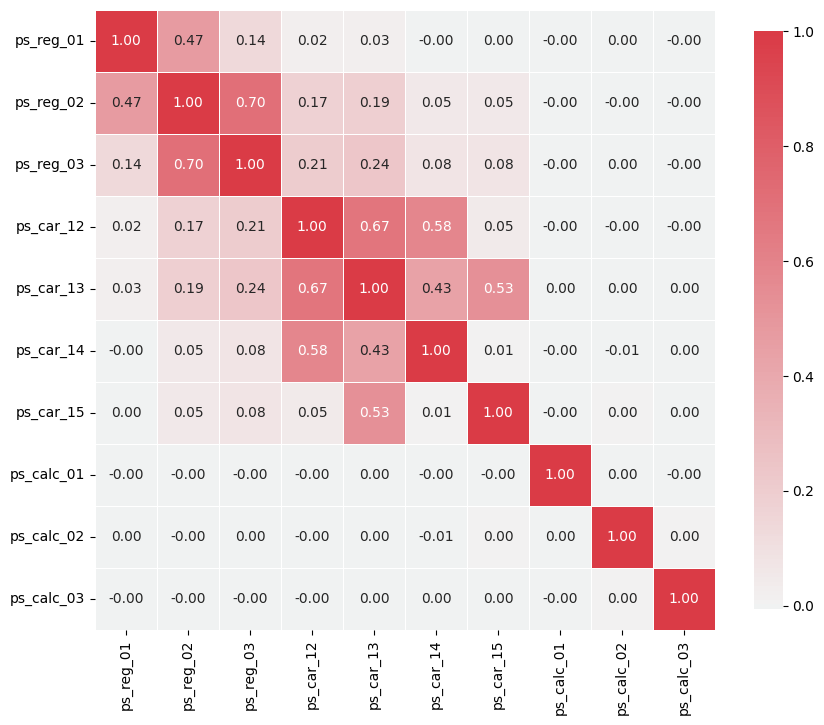

In [27]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220,10,as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
    plt.show()

v = meta[(meta.level == 'interval')&(meta.keep)].index
corr_heatmap(v)

- ps_reg_02, ps_reg_03 (0.7)
- ps_car_12, ps_car_13 (0.67)
- ps_car_12, ps_car_14 (0.58)
- ps_car_13, ps_car_15 (0.53)

In [28]:
s = train.sample(frac=0.1)

### 8-2-1. ps_reg_02, ps_reg_03

회귀선에서 볼 수 있듯 이 변수들 사이에는 선형관계가 있음.

target 0과 1에 대한 회귀선이 동일하다는 것을 볼 수 있음

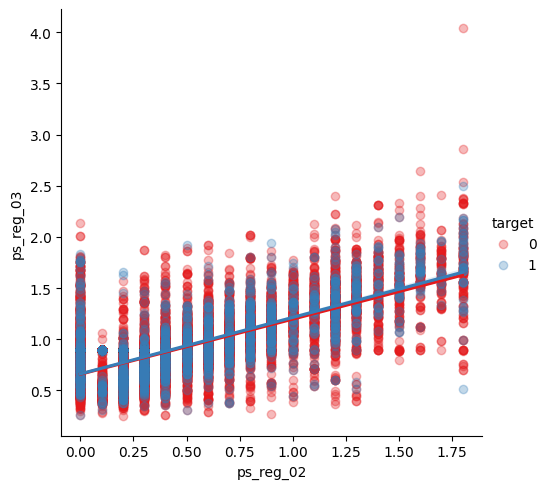

In [29]:
# 산점도와 회귀식 동시에 그리기
sns.lmplot(x='ps_reg_02',y='ps_reg_03',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

### 8-2-2. ps_car_12, ps_car_13

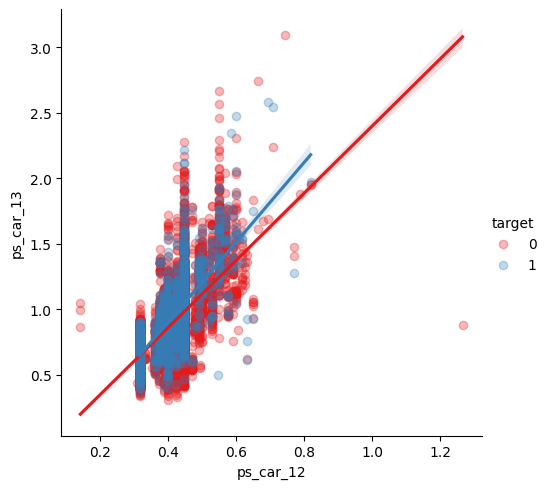

In [30]:
sns.lmplot(x='ps_car_12',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

### 8-2-3. ps_car_12, ps_car_14

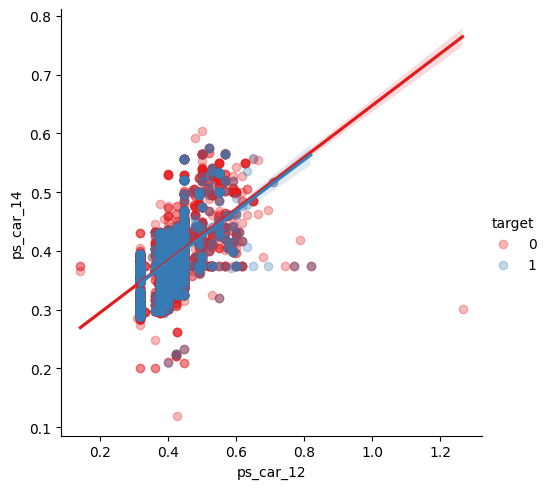

In [31]:
sns.lmplot(x='ps_car_12',y='ps_car_14',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

### 8-2-4. ps_car_13, ps_car_15

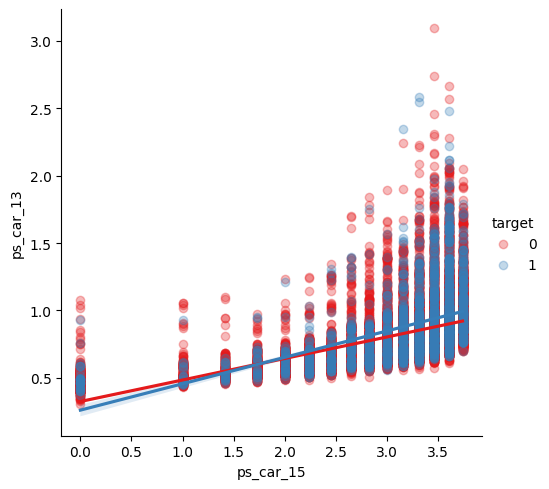

In [32]:
sns.lmplot(x='ps_car_15',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

차원을 줄이기 위해 변수에 대해 주성분 분석(PCA)를 수행할 수 있음.

### 8-3. Checking the correlation between ordinal variables

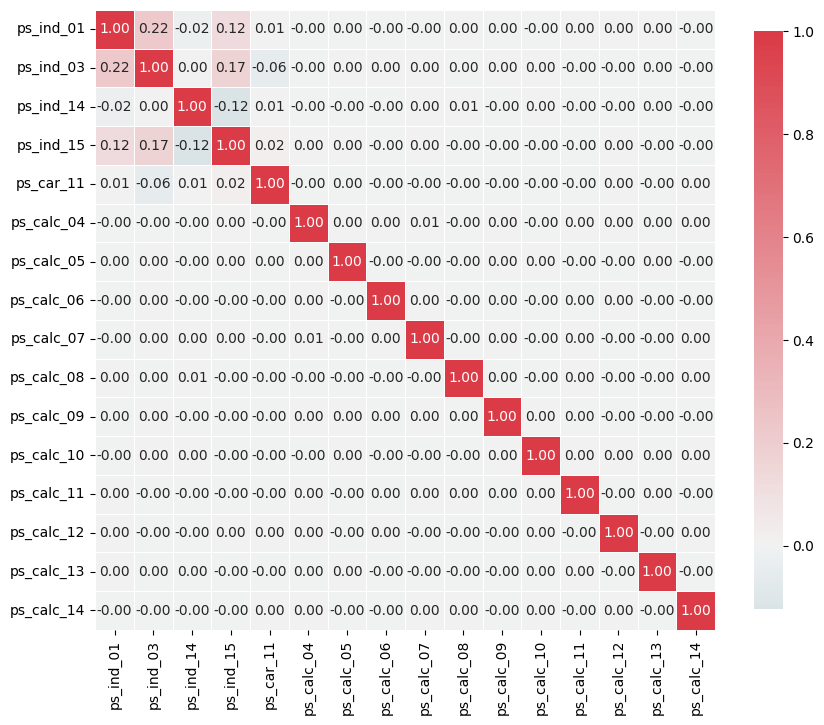

In [33]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
corr_heatmap(v)

ordinal variables의 경우 상관관계가 많이 나타나지 않음.

목표 값으로 그룹화할때 분포가 어떻게 나타나는지 살펴볼 수 있음


# 9. Feature Engineering

## 9-1. Creating dummy variables

범주형 변수의 값은 순서나 크기를 나타내지 않음.


In [34]:
v = meta[(meta.level=='nominal')&(meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


dummy variables가 52개 추가되었음

## 9-2. Creating interaction variables

In [35]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


# 10. Feature Selection

## 10-1. Removing features with low or zero variance

In [36]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id','target'],axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x: not x) # Function to toggle boolean arrray elements

v = train.drop(['id','target'],axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산을 기반으로 선택하면 많은 변수를 잃게 될 수 있음.

하지만 변수가 많지 않기 때문에 분류기가 선택하도록 함. 변수가 더 많은 데이터 세트의 경우 처리 시간을 단축 할 수 있음.

분류기가 최적의 특징을 선택하고 계속 진행할 수 있는 SelectFromModel 아래에서는 RandomForest로 작업수행하는 방법을 보여줌.

## 10-2. Selecting features with a Random Forest and SelectFromModel
RandomForest의 특징 중요도에 따라 특징선택을 함.

그런다음 sklearn의 SelectFromModel을 사용하여 유지할 변수 수를 지정함.

특징 중요도 수준에 대한 임계값을 수동으로 설정할 수 있음.

하지만 상위 50% 최적 변수만 선택하면 됨.

In [37]:
from tqdm import tqdm

In [38]:
X_train = train.drop(['id','target'],axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [39]:
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in tqdm(range(X_train.shape[1])):
    print("%2d) %-*s %f"%(f + 1, 30, feat_labels[indices[f]],importances[indices[f]]))

100%|██████████| 162/162 [00:00<00:00, 93091.83it/s]

 1) ps_car_11_cat_te               0.021141
 2) ps_car_13                      0.017355
 3) ps_car_12 ps_car_13            0.017260
 4) ps_car_13 ps_car_14            0.017224
 5) ps_car_13^2                    0.017209
 6) ps_reg_03 ps_car_13            0.017093
 7) ps_car_13 ps_car_15            0.016827
 8) ps_reg_01 ps_car_13            0.016711
 9) ps_reg_03 ps_car_14            0.016256
10) ps_reg_03 ps_car_12            0.015573
11) ps_reg_03 ps_car_15            0.015188
12) ps_car_14 ps_car_15            0.015024
13) ps_reg_01 ps_reg_03            0.014701
14) ps_car_13 ps_calc_01           0.014697
15) ps_reg_02 ps_car_13            0.014688
16) ps_car_13 ps_calc_02           0.014664
17) ps_car_13 ps_calc_03           0.014655
18) ps_reg_01 ps_car_14            0.014396
19) ps_reg_03^2                    0.014241
20) ps_reg_03                      0.014205
21) ps_reg_03 ps_calc_02           0.013791
22) ps_reg_03 ps_calc_01           0.013759
23) ps_reg_03 ps_calc_03        

SelectFromModel을 사용하면 어떤 프리핏 분류기를 사용할지와 특징 중요도에 대한 임계값을 지정할 수 있음

get_support 방법을 사용하면 train 데이터의 변수 수를 제한 할 수 있음.

In [40]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of features before selection: 162
Number of features after selection: 81


In [41]:
train = train[selected_vars + ['target']]

# 11. Feature Scaling

In [42]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'],axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])